In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [17]:
t = titles
c = cast
t.title.value_counts().head(10)

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
She                     11
Blood Money             11
Maya                    11
The Outsider            11
Temptation              10
Honeymoon               10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [21]:
c[c.year//10*10 == 1930].year.value_counts().head(3)

1937    27052
1936    25453
1938    24793
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

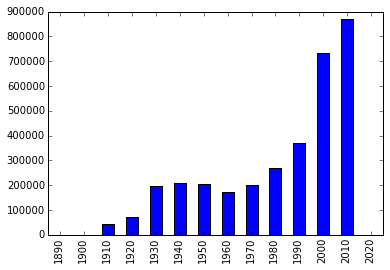

In [33]:
(c.year//10*10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

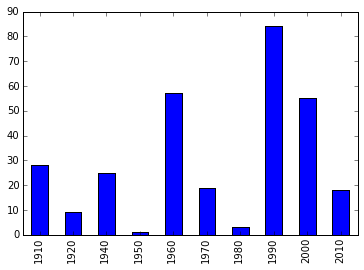

In [39]:
hamlet = c[c.title == 'Hamlet']
(hamlet.year//10*10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

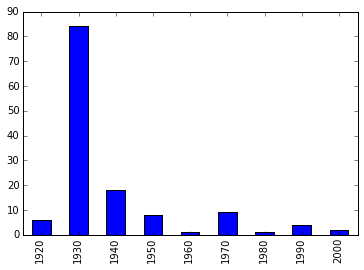

In [41]:
rustler = c[c.character == 'Rustler']
(rustler.year//10*10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

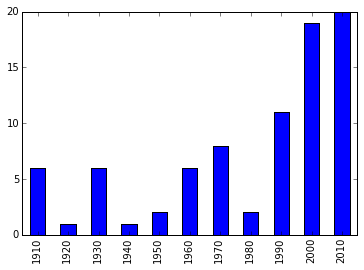

In [48]:
hamlet = c[c.character == 'Hamlet']
series = (hamlet.year//10*10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [50]:
c.character.value_counts().head(11)

Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
Policeman       6501
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [54]:
herself = c[c.character == 'Herself']
herself.name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Joan Rivers             7
Mary Jo Pehl            7
Lili?n Garc?a           6
Sally Jessy Raphael     5
Bunny Yeager            5
Caroline Rhea           5
Kareena Kapoor          5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [55]:
himself = c[c.character == 'Himself']
himself.name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Winston Churchill        20
Franklin D. Roosevelt    20
George W. Bush           20
Bill Clinton             20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [58]:
c[c.year == 1945].name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      28
Bess Flowers       28
Nolan Leary        27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [59]:
c[c.year == 1985].name.value_counts().head()

Shakti Kapoor    19
Mammootty        19
Sukumari         17
Lou Scheimer     15
Aruna Irani      14
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

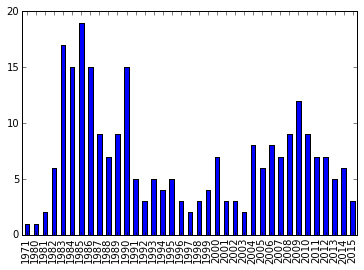

In [63]:
c[c.name == 'Mammootty'].year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [65]:
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [66]:
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         54
Science Student          8
Science Fair Student     8
Science Reporter         5
Science Club Member      5
Science Promo Cadet      4
Science Fair Judge       4
Science Kid              4
Science Fair Kid         3
Science Officer          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

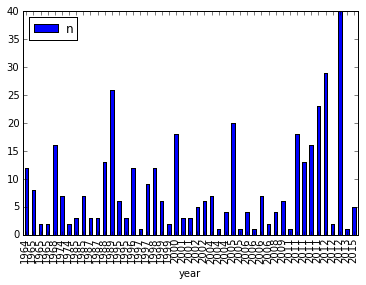

In [83]:
judi = c[c.name == 'Judi Dench']
judi[judi.n.notnull()].sort(['year']).plot(x='year',y='n',kind='bar')

### Plot the n-values of Cary Grant's roles through his career.

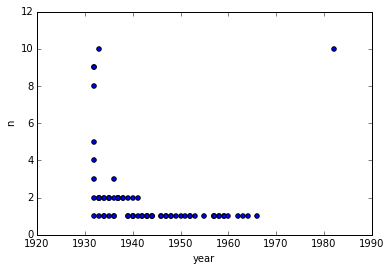

In [84]:
cary = c[c.name == 'Cary Grant']
cary[cary.n.notnull()].sort(['year']).plot(x='year',y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

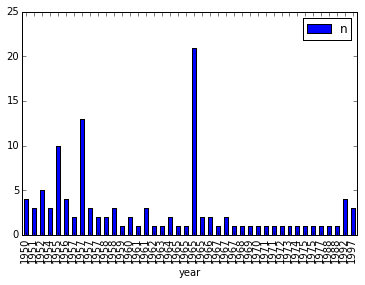

In [85]:
sidney = c[c.name == 'Sidney Poitier']
sidney[sidney.n.notnull()].sort(['year']).plot(x='year',y='n',kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [88]:
movies = c[(c.year//10 == 195) & (c.n == 1)]
movies.groupby(['type']).size()

type
actor      6388
actress    2813
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [89]:
movies = c[(c.year//10 == 195) & (c.n == 2)]
movies.type.value_counts()

actress    4404
actor      4382
dtype: int64